In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import datetime
from dateutil import parser


In [2]:
incidents_df = pd.read_csv("data/Police_Incidents_Since_1988.csv")

C:\Users\jlivs\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
pd.set_option('display.max_columns', None)

incidents_df.head()

,INCIDENT,DATE OCCURRED,TIME OCCURRED,YEAR OCCURRED,MONTH OCCURRED,DATE REPORTED,TIME REPORTED,DATE ARRIVED,TIME ARRIVED,GEO CODE,HOUSE NUMBER BLOCK,STREET,CRIME CODE,CRIME DESCRIPTION,CRIME CATEGORY,CRIME CATEGORY DESCRIPTION,CSA DESCRIPTION,PLACE CODE,PLACE CODE DESCRIPTION,WEAPONS CODE 1,WEAPON 1 DESCRIPTION,WEAPONS CODE 2,WEAPON 2 DESCRIPTION,WEAPONS CODE 3,WEAPON 3 DESCRIPTION,BIAS CODE,BIAS DESCRIPTION,STATUS CODE,STATUS DESCRIPTION,COUNTER,MAPPING ADDRESS
0,U20-03776,08/27/2020,14:52,2020,8,08/27/2020,14:52,08/27/2020,00:00,576-06,800 BLOCK,GROVE ST,6519.0,ABANDONED JUNK VEHICLES,C71,Lost & Found,NONE,304,STREET,NaN,NaN,NaN,NaN,NaN,NaN,88.0,NONE,9.0,ADMINISTRATIVELY CLOSED,1,"800 GROVE ST\nURBANA, IL"
1,U19-02945,06/18/2019,18:58,2019,6,06/18/2019,18:58,06/18/2019,19:12,546-15,0 BLOCK,RACE N,6616.0,FAILURE TO YIELD AT INTERSECTION,C28,Traffic Offenses,NONE,304,STREET,NaN,NaN,NaN,NaN,NaN,NaN,88.0,NONE,3.0,CLEARED BY ADULT ARREST,1,"0 RACE N\nURBANA, IL"
2,U20-03799,08/28/2020,15:45,2020,8,08/28/2020,15:45,08/28/2020,15:52,546-11,400 BLOCK,UNIVERSITY AV W,6569.0,ACCIDENT ON PRIVATE PROPERTY,C37,Accident,NONE,304,STREET,NaN,NaN,NaN,NaN,NaN,NaN,88.0,NONE,9.0,ADMINISTRATIVELY CLOSED,1,"400 UNIVERSITY AV W\nURBANA, IL\n(40.116511, -..."
3,U93-01386,03/15/1993,06:17,1993,3,03/15/1993,06:30,03/15/1993,06:30,547-11,400 BLOCK,E MAIN ST,1410.0,UNLAWFUL USE OF WEAPONS,C18,Weapons Offenses,COMMITTED,90,APARTMENT,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,3.0,CLEARED BY ADULT ARREST,1,"400 E MAIN ST\nURBANA, IL\n(40.112553, -88.203..."
4,U20-03321,08/01/2020,09:29,2020,8,08/01/2020,09:29,08/01/2020,09:29,548-10,0 BLOCK,UNIVERSITY,9081.0,ASSIST TOW TRUCK,C41,Assist Other Agency/Business,NONE,304,STREET,NaN,NaN,NaN,NaN,NaN,NaN,88.0,NONE,9.0,ADMINISTRATIVELY CLOSED,1,"0 UNIVERSITY\nURBANA, IL"


In [58]:
length = len(incidents_df)
# latitude = [40.116511] * length
# longitude = [-88.21083] * length
latitude = [np.nan] * length
longitude =[np.nan] * length
for index, value in incidents_df['MAPPING ADDRESS'].items():
    #lat/long
    value = str(value)
    left_ind = value.find('(')
    mid_ind = value.find(',', left_ind)
    right_ind = value.find(')')
#     print(left_ind, mid_ind, right_ind)
    if left_ind!=1 and mid_ind !=1 and right_ind !=-1:# diego's code
        latitude[index] = float(value[left_ind+1: mid_ind])
        longitude[index] = float(value[mid_ind+1:right_ind])

        
        
        
        
        
time =[np.nan] * length
for index in range(length):
    if index %50000==0:
        print("currently on row ", index, "out of ", length)
    arrive = (str(incidents_df['DATE REPORTED'][index]) + ' ' + str(incidents_df['TIME REPORTED'][index]))
    report = (str(incidents_df['DATE ARRIVED'][index]) + ' ' + str(incidents_df['TIME ARRIVED'][index]))
    try:
        a = parser.parse(arrive)
        b = parser.parse(report)
        delt = b-a
        elapsed = delt.total_seconds()//60
        if elapsed>=0 and elapsed<300:  #ignoring 0 minutes because it was probably not a caller
            time[index] = elapsed
    except:
        pass
        
print('done!')

incidents_df['LATITUDE'] = latitude
incidents_df['LONGITUDE'] = longitude
incidents_df['TIME'] = time
pd.set_option('display.max_rows', None)

incidents_df.head()

currently on row  0 out of  474609
currently on row  50000 out of  474609
currently on row  100000 out of  474609
currently on row  150000 out of  474609
currently on row  200000 out of  474609
currently on row  250000 out of  474609
currently on row  300000 out of  474609
currently on row  350000 out of  474609
currently on row  400000 out of  474609
currently on row  450000 out of  474609
done!


,INCIDENT,DATE OCCURRED,TIME OCCURRED,YEAR OCCURRED,MONTH OCCURRED,DATE REPORTED,TIME REPORTED,DATE ARRIVED,TIME ARRIVED,GEO CODE,HOUSE NUMBER BLOCK,STREET,CRIME CODE,CRIME DESCRIPTION,CRIME CATEGORY,CRIME CATEGORY DESCRIPTION,CSA DESCRIPTION,PLACE CODE,PLACE CODE DESCRIPTION,WEAPONS CODE 1,WEAPON 1 DESCRIPTION,WEAPONS CODE 2,WEAPON 2 DESCRIPTION,WEAPONS CODE 3,WEAPON 3 DESCRIPTION,BIAS CODE,BIAS DESCRIPTION,STATUS CODE,STATUS DESCRIPTION,COUNTER,MAPPING ADDRESS,LATITUDE,LONGITUDE,TIME,COUNT
0,U20-03776,08/27/2020,14:52,2020,8,08/27/2020,14:52,08/27/2020,00:00,576-06,800 BLOCK,GROVE ST,6519.0,ABANDONED JUNK VEHICLES,C71,Lost & Found,NONE,304,STREET,NaN,NaN,NaN,NaN,NaN,NaN,88.0,NONE,9.0,ADMINISTRATIVELY CLOSED,1,"800 GROVE ST\nURBANA, IL",NaN,NaN,NaN,1
1,U19-02945,06/18/2019,18:58,2019,6,06/18/2019,18:58,06/18/2019,19:12,546-15,0 BLOCK,RACE N,6616.0,FAILURE TO YIELD AT INTERSECTION,C28,Traffic Offenses,NONE,304,STREET,NaN,NaN,NaN,NaN,NaN,NaN,88.0,NONE,3.0,CLEARED BY ADULT ARREST,1,"0 RACE N\nURBANA, IL",NaN,NaN,14.0,1
2,U20-03799,08/28/2020,15:45,2020,8,08/28/2020,15:45,08/28/2020,15:52,546-11,400 BLOCK,UNIVERSITY AV W,6569.0,ACCIDENT ON PRIVATE PROPERTY,C37,Accident,NONE,304,STREET,NaN,NaN,NaN,NaN,NaN,NaN,88.0,NONE,9.0,ADMINISTRATIVELY CLOSED,1,"400 UNIVERSITY AV W\nURBANA, IL\n(40.116511, -...",40.116511,-88.210833,7.0,1
3,U93-01386,03/15/1993,06:17,1993,3,03/15/1993,06:30,03/15/1993,06:30,547-11,400 BLOCK,E MAIN ST,1410.0,UNLAWFUL USE OF WEAPONS,C18,Weapons Offenses,COMMITTED,90,APARTMENT,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,3.0,CLEARED BY ADULT ARREST,1,"400 E MAIN ST\nURBANA, IL\n(40.112553, -88.203...",40.112553,-88.203804,0.0,1
4,U20-03321,08/01/2020,09:29,2020,8,08/01/2020,09:29,08/01/2020,09:29,548-10,0 BLOCK,UNIVERSITY,9081.0,ASSIST TOW TRUCK,C41,Assist Other Agency/Business,NONE,304,STREET,NaN,NaN,NaN,NaN,NaN,NaN,88.0,NONE,9.0,ADMINISTRATIVELY CLOSED,1,"0 UNIVERSITY\nURBANA, IL",NaN,NaN,0.0,1


In [59]:
count = [1] * length
incidents_df['COUNT'] = count
simple_df = incidents_df[['DATE OCCURRED','TIME REPORTED', 'TIME','YEAR OCCURRED','MONTH OCCURRED', 'GEO CODE', 'HOUSE NUMBER BLOCK', 'CRIME CODE', 'PLACE CODE','LATITUDE','LONGITUDE', 'COUNT', 'CRIME CATEGORY', 'CRIME CATEGORY DESCRIPTION']]
# simple_df = simple_df[simple_df['LONGITUDE'].notna()]

<AxesSubplot:>

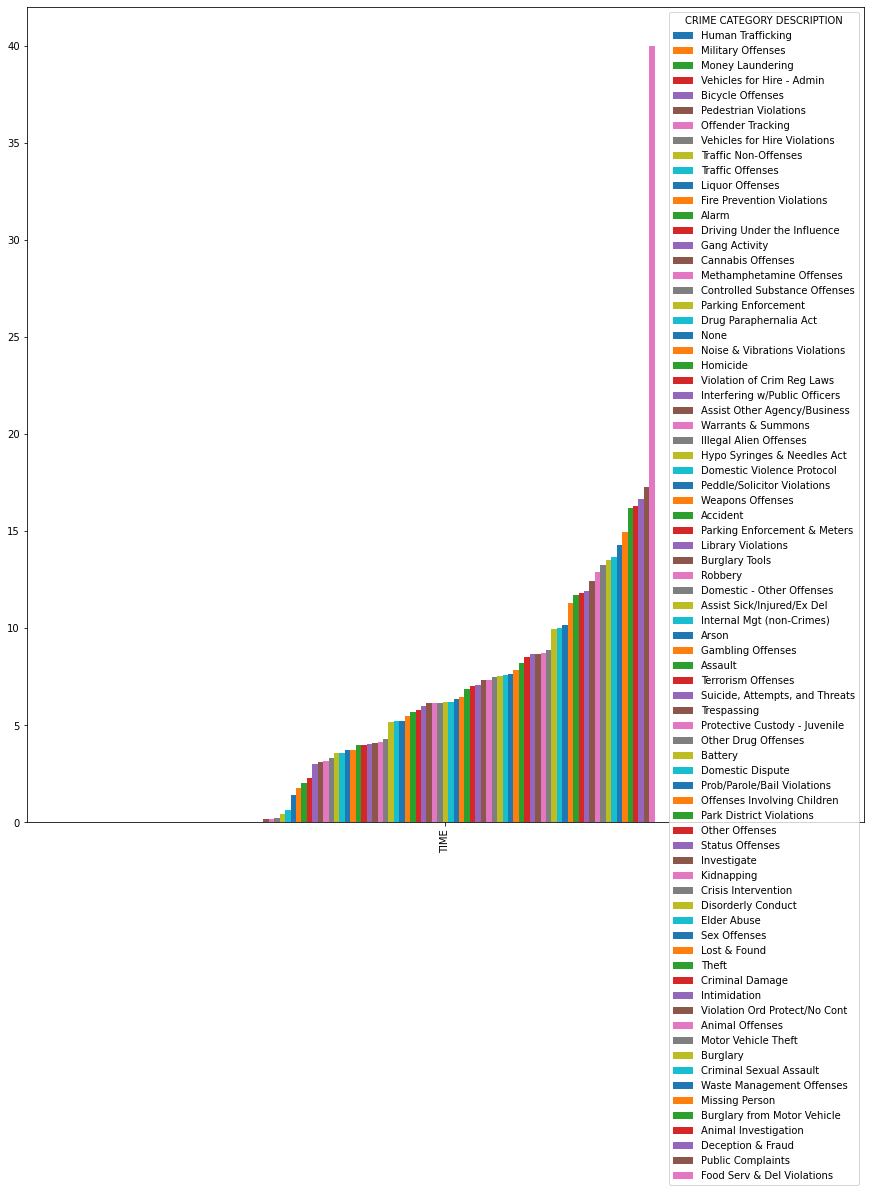

In [65]:
#remove rows with invalid time column value
#this method could take a while!

# simple_df.drop(err)
s = simple_df.pivot_table(values ='TIME', columns=['CRIME CATEGORY DESCRIPTION'], aggfunc=np.mean).sort_values(by='TIME', axis=1)
#s.head()
s.plot.bar(figsize=(15,15))

In [62]:
simple_df.head(10)
t = simple_df[['TIME']]
t = t[t['TIME'].notna()]
t["TIME"].mode()


0    0.0
dtype: float64

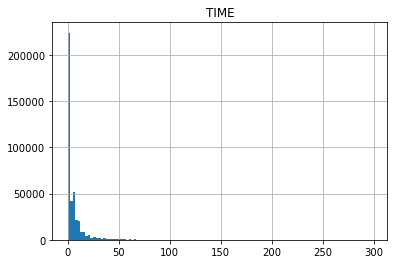

In [63]:
hist = t.hist(bins=120)

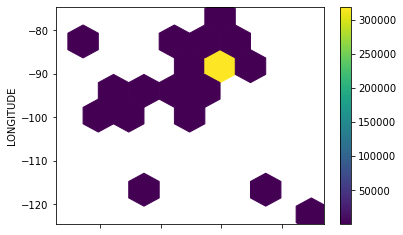

In [18]:
ax = simple_df.plot.hexbin(x='LATITUDE',
                    y='LONGITUDE',
                    C='COUNT',
                    reduce_C_function=np.sum,
                    gridsize=8,
                    cmap="viridis")